# <center><font color="#0089fe">Black death simulation</font><center>

## <font color="#0089fe">Description</font>
This programs calculates the historical number of weekly deaths attributable to the plague across 16 square parishes for the 1665 plague outbreak in London. 
The estimated number of weekly deaths per 100m<sup>2</sup> is defined as 
<center><b>deaths (d) = (r x rat) x (p x pop)</b>,</center><br>
where `rat` equals the average number of rats caught per week per 100m<sup>2</sup> and `pop` denotes the average population density per 100m<sup>2</sup>. The default values for the parameters `r` and `p` were derived from a hypothetical study and are set at 1.3 (p) and 0.8 (r) respectively. (See <a id="section_ID" href="http://www.geog.leeds.ac.uk/courses/computing/study/core-python-odl/assessment2/death.html">Black death project</a> for details.) <br>
<br>
The project requires two input raster data sets (`death.parishes.txt` and `death.rats`). In the absence of the file the program will try to read the files from the <a id="section_ID" href="http://www.geog.leeds.ac.uk/courses/computing/study/core-python-odl/assessment2/death.html">project webpage</a>. In case the files are imported from the web, a copy of the raster data is saved as a text files. Before displaying and exporting the raster maps on screen, the progam will adjust the size of the output maps to only include the 16 square parishes. <br>The expected number of plague deaths is calculated using the above formula. The resulting raster map is is displayed individually and together with the input raster maps. In addition, the progroam exports the the raster data as text file and calculates the cumulative weekly number of expected plague deaths. Lastly, the program will display an interactive map allowing users to alter the `r` and `p` parameters to increase or decrease plague related mortality. Optionally, the resulting map and raster data can be exported as well. 


The code is split in three parts. [Part I](#part_I) adjusts the general settings of the program and imports required packages. [Part II](#part_II) is defining the required function and clases while [Part III](#part_III) is executing project and displaying the various maps.



## <a id="part_I"><font color="#0089fe">Part I. Settings</font></a> 
### <font color="#0089fe">I.I Import Python packages</font>
First, import the required python packages. The script requires elements, modules and packages from five main libraries.
 - The `os` and `sys` packages are required to set the working directory and create subfolders within the working directory which are used to store output files from this program. 
 - The `tkinter` graphical user interface (GUI) package and is used to create customized pop-up windows to display on screen messages and request user inputs. For more flexibility in designing prompts the `tkinter messagebox` module is also required.
 - To account for users who do not have the required source files, the `requests` package is used to read the data from the <a id="section_ID" href="http://www.geog.leeds.ac.uk/courses/computing/study/core-python-odl/assessment2/death.html">python ODL course webpage</a>.
 - All plots in this program are generated using the `matplotlib.pyplot` package.To gain more flexibility in customizing the different outputs the matplotlib `ticker` module and the `axes_grid1` helper classes from the `matplotlib toolkits` are utilized as well as the NumPy packages to create customized axis labels.
 -  Lastly, to enable user to interact with maps, the `Slider` and `Button` modules from the matplotlib widgets package are drawn upon.
 
 

In [4]:
import os
import sys
import tkinter as tk
from tkinter import messagebox as msgbox
import requests as req
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider , Button
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import  ticker

### <a id="part_II"><font color="#0089fe">I.II Notebook settings</font></a>
-  Change the notebook to a matplotlib notebook. This is required to enable interactive plots.
-  To prevent figures form being automatically displayed turn off the interactive mode of pyplot.

In [5]:
%matplotlib notebook
plt.ioff()

## <a id="part_II"><font color="#0089fe">Part II. Defining required function and classes</font></a>
Function written for this program were categorized in to ... clases
-  [SetWD](#SetWD): Sets the working directory and create required output folders.
-  [LoadData](#ReadData): Reads raster data from a text file or the web into an array.
-  [MapData](#MapData): Maps raster data and exports figure as png. The class allows to create figures with up to four sub-plots.
-  [CalculateDeaths](#CalculateDeaths): Calculates the number of deaths per 100m<sup>2</sup> as well as the cumulative numbero of deahts across the 16 squar parishes.
-  [InteractivePlot](#InteractivePlot): Updates the the interactive map based on user inputs.


### <a id="SetWD"><font color="#0089fe">I.II Set the working directory</font> </a>
To improve user-friendliness and to facilitate location various outputs from the program, maps exported as part of the program are store in a folder called `Output`. Similarly, text files used to create the raster maps are compiled in a folder labelled `Data`. Hence, the program first has to create the respective sub-folders. A tkinter input prompt is used to allow users to set the location of these folders by defining the working directory. 

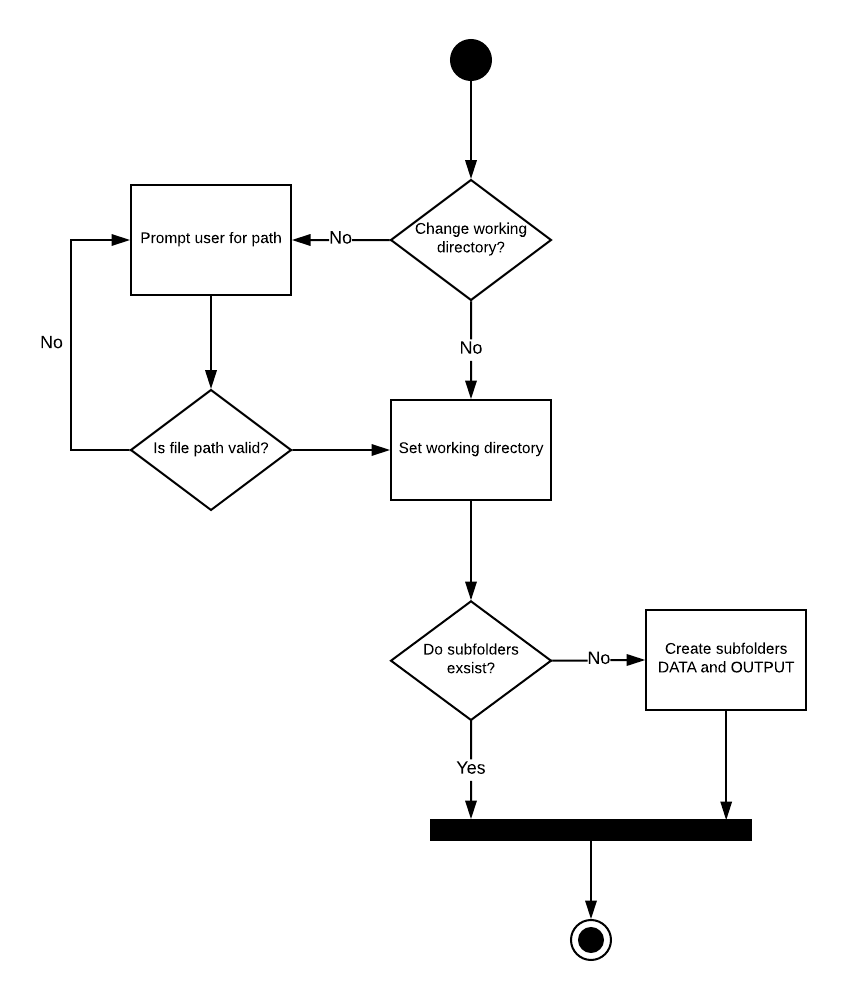
<center>**Fig 1. ULM flowchart - Set working dirctory**</center>

In [6]:
class SetWD():
    #Set working direcotry and create 'Data' and 'Output' sub-folders.
    
    def __init__(self):
        self.root = tk.Tk()
        self.root.withdraw()
        #Hide main tkinter window
        res = msgbox.askyesno("File path","Would you like to change the default file path?" +
                              os.path.dirname(os.path.abspath(sys.argv[0])))
        #boolean: Return true if user selects yes. 
        self.root.destroy()
        #Close tkinter form.
        if res:
            self.create_form()
            #Prompt user for working directory path.
        else:
            os.chdir(os.path.dirname(os.path.abspath(sys.argv[0])))
            #Change working directory to current file path.
            self.create_subfolder(os.path.dirname(os.path.abspath(sys.argv[0])))
            #Check if required subf-olders exisit.
    
    def create_form(self):       
        # Create input prompt.
        
        self.pop_input = tk.Tk()
        self.root.withdraw()
        # hide main tkinter window
        
        self.etry = tk.Entry(self.pop_input,width=35)
        #object: Create tkinter input prompt
        self.pop_input.title("File path")
        #Add a title to the pop-up window.
        
        #Add text labels to the pop-up window.
        tk.Label(self.pop_input, text="Enter file path:").grid(row=0, padx=5,pady=5)
        tk.Label(self.pop_input, text="(Select Quit to use default path)",
                 font="Roboto 8 italic").grid(row=2,column=1, pady=5,stick=tk.W)
        
        #Add an input field to the pop-up window.
        #Display current file path as default value. 
        self.etry.insert(10,os.path.dirname(os.path.abspath(sys.argv[0])))   
        self.etry.grid(row=0, column=1, columnspan=1, padx=10,pady=5)
        
        # Add two buttons to commit (OK) and abort (Quit) the pop-up window.
        tk.Button(self.pop_input, text='Quit', command=self.quit).grid(row=2, column=0, sticky=tk.E, padx=15, pady=5)
        tk.Button(self.pop_input, text='OK', command=self.show_entry_fields).grid(row=2, column=0, sticky=tk.W, padx=5, pady=5)
        
        tk.mainloop()
        #Launch pop-up window.
        
    def show_entry_fields(self):
        #Evaluate if user provided a valide file path.
        try:
            path = self.etry.get()[:-1] if self.etry.get().endswith('/') or self.etry.get().endswith('\\') else self.etry.get() 
            #Remove trailing slashes. To account for different operating systems, check for both forward- and back-slashes.
            path = path[:-4] if path[-4:].upper() == 'DATA' else  path[:-6] if path[-6:].upper() == 'OUTPUT' else path
            #Avoid creating unncessairy folders. Check if user gave path for 'Data' or 'Output' sub-folders.
            os.chdir(path)
            #Test file path to check if it is valid.
            self.create_subfolder(path)
            #Create 'Data' and 'Output' subfolders.
            self.pop_input.destroy()
            #Destroy the tkinter window.
           
        except OSError:
            tk.Label(self.pop_input, text='This path is not a valid path. Please try again!', anchor=tk.S, 
                     justify=tk.LEFT, fg="red").grid(row=1,columnspan=2)
            #Alert the user of an invalid path by adding an error label to input prompt.
        
    def quit(self):
        #If the user decides to abort entering a new file path, set working directory to current file path.
        self.pop_input.destroy()
        #Close tkinter pop-up window.
        os.chdir(os.path.dirname(os.path.abspath(sys.argv[0])))
        #Set working directory to this file's path.
        self.create_subfolder(os.path.dirname(os.path.abspath(sys.argv[0])))
        #Create subf-olders. 
        
    def create_subfolder(self,path):
        #Create sub-folders.
        
        #args:
            #path (str): file path
            
        #Check if sub-folders 'Data' and 'Output' exisits. Create if necessairy.
        if not os.path.exists(os.path.join(path,'DATA')): os.makedirs(os.path.join(path,'DATA'))
        if not os.path.exists(os.path.join(path,'OUTPUT')): os.makedirs(os.path.join(path,'OUTPUT'))



        

###  <a id="ReadData"><font color="#0089fe">II.II Load data</font></a>
The script first tries to read the data from the corresponding files in the `Data` sub-folder.If the files do not exist or are corrupted the data will be loaded from the <a href="http://www.geog.leeds.ac.uk/courses/computing/study/core-python-odl/assessment2/death.html">Python programming ODL course webpage</a>.
<br>Files to be loaded

-  <a id="section_ID" href="http://www.geog.leeds.ac.uk/courses/computing/study/core-python-odl/assessment2/death.parishes">death.rats.txt</a> (Average population densities per 100m<sup>2</sup> for 16 square parishes), and
-  <a id="section_ID" href="http://www.geog.leeds.ac.uk/courses/computing/study/core-python-odl/assessment2/death.ratss">death.rats.txt</a> (Average number of rats caught per week per 100m<sup>2</sup> square for each rat catcher domain).
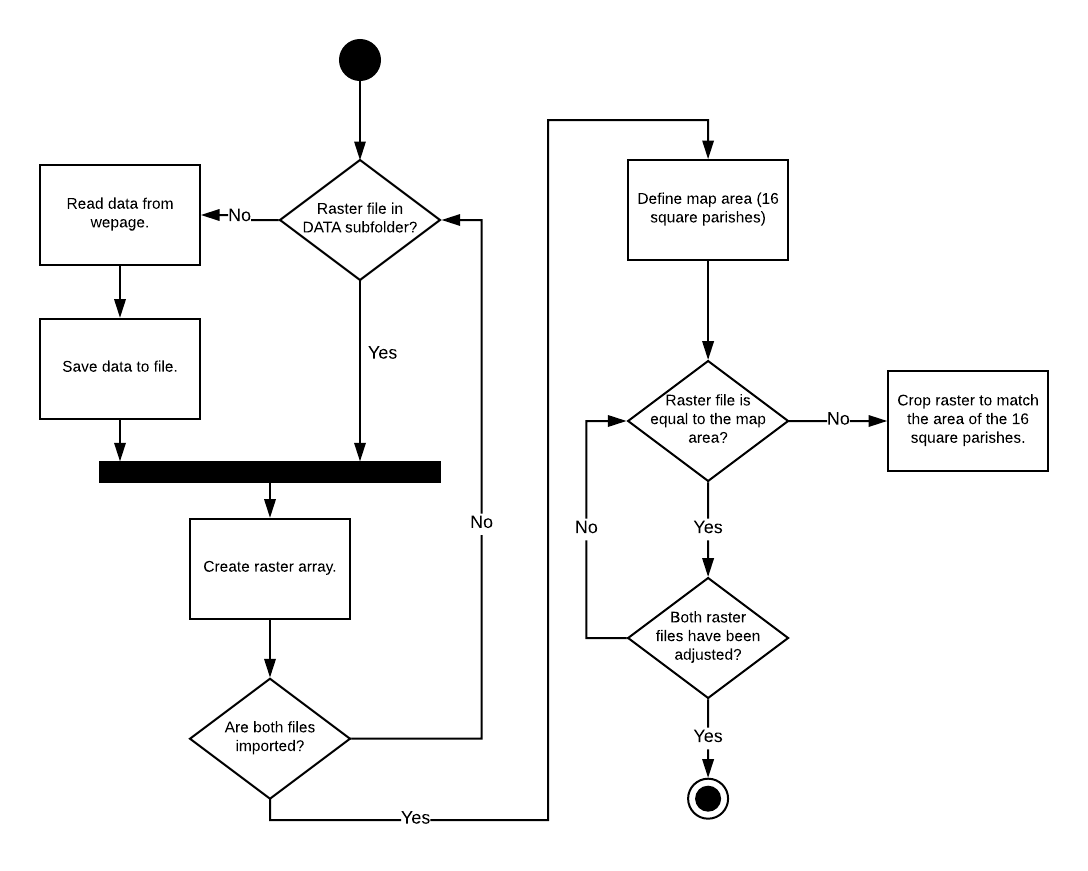

<center>**Fig 1. ULM flowchart - Import raster files**</center>

In [7]:
class LoadData(): 
    #Import raster data.
    
    def __init__(self,map_data):
        self.map_data = map_data
        #list: Store the raster data.
        
    def read_data(self,fname):
        #Read data from file.
        
        #Try to read the data from files in the DATA subfolder. If files do not exist or are corrupted,
        #import the data from the odl course webpage.
        
        #args:
            #fname (str): file name
        
        ary = []
        #list: Create an empty list to store the raster values.

        try:
            with open('DATA/' + fname +'.txt', "r", newline='\n') as file: 
                #Open file.
                for line in file:
                    #Loop through every line in the file.
                    rowlist  = []
                    #list: Create empty list to store the raster data for a single line.
                    line = line.replace('\n','').split(',') #replace is required as there are random line breaks in the data.
                    #list: Convert string of pixel values into a list.
                    for value in (line):
                        #Loop through each value in line.
                        rowlist.append(int(value))
                        #Convert pixel value to an integer and append to the list.
                    ary.append(rowlist)
                    #Append the row list to the array list. 
            file.close()
            #Close the file.
            
        except (OSError,ValueError):
            #If error occurs retrieve data from odl course webpage.

            link = 'http://www.geog.leeds.ac.uk/courses/computing/study/core-python-odl/assessment2/'
            #string: odl course webpage link
            try:
                results = req.get(link + fname,timeout=10) 
                #str: Store request results.
                with open(os.path.join('DATA',fname +'.txt'), "w", newline='\n') as file: 
                    #Create a new file if it does not exists and open it.
                    for line in results.iter_lines():
                        #Loop through each line of the request results, add it to raster array and write it to a file.
                        if len(line)>1: # required to account for empty lines
                            file.write(str(line.decode("utf-8"))+'\n')
                            #Write line to file. Add line break at the end of each line.
                            res = line.decode("utf-8").split(',')
                            #list: Convert line string to a list.
                            ary.append(list(map(int, res)))
                            #Convert string values to integers and append the list to the raster array.
                file.close()
                #Close the file.
                
            except req.exceptions.ConnectionError as e:
                #If conenction cannot be established, create a tkinter pop-up window with an error message and stop the program.
                er_msg = tk.Tk()
                er_msg.withdraw()   
                msgbox.showerror("Error","Error connecting to the internet. Check your wifi connection.")
                er_msg.destroy()  
                sys.exit() # stop program
            
            except (ValueError, IOError):
                #Account for value and IO error when writing data to a file.
                #Create tkinter error message and stop the program. 
                er_msg = tk.Tk()
                er_msg.withdraw()   
                msgbox.showerror("Error","Error writing data to file.")
                sys.exit() # stop program
           
        finally:
            return ary
            #return the raster array.
        
    def set_map_area(self,index):
        #Adjust the raster size to match size of the 16 square parishes.
        try:
            self.raster_size
            #Test if raster size variable exists.
            
        except AttributeError: 
            #Define raster length and width.
            lgt = []
            wdt = []
            #lists: Create two empty list to store the starting position of each new parish (length and width). 
            
            for i,vlgt in enumerate(self.map_data[0]):
                #Loop through each row of the raster to get the length of a square parish.
                if i >1: 
                    #Skip the first iteration.
                    if vlgt[0] != self.map_data[0][i-1][0]:
                        #Get the first pixel of each new parish."""
                        lgt.append(i) 
                        #Append the value to the list.
      
            for j, vwdt in enumerate(self.map_data[0][0]):
                #Loop through each value of the first row to get the width of each square parish.
                if j>1:
                    #Skip the first iteration.
                    if vwdt != self.map_data[0][0][j-1]:
                        #Get the first pixel of each new parish.
                        wdt.append(j)
                        #append the value to the list.
             
            self.raster_size = []
            #list: Empty list to store the last row and column of the final map area.
            self.raster_size.append(400) if len(lgt)<=3 else self.raster_size.append(lgt[3])
            self.raster_size.append(400) if len(wdt)<=3 else self.raster_size.append(wdt[3])
            #If the length of the length or width list is greater than three the are trailing rows/columns.
            
        finally:
            #Adjust the size of raster.""
            
            if len(self.map_data[index])> self.raster_size[0]:
                
                self.map_data[index] = self.map_data[index][:self.raster_size[0]]
            if len(self.map_data[index][0])>self.raster_size[1]:
                #If the raster exceeds the defined number of columns, remove the traling columns.
                ary = []
                #list: Create empty, temporary list to store the list of pixel for a single row.
                for line in self.map_data[index][0]:
                    #Loop through each line of the raster.
                    ary.append(line[:self.raster_size[1]])
                    #Adjust the column length.
                self.map_data[index] = ary
                #replace the original raster with the adjusted raster.

### <a id="MapData"><font color="#0089fe">II.III Plot raster data</font></a>
To avoid unnecessary code repetitions, a generic class was created to map the different raster files, allowing users to display up to four maps on a single figure. In addition, users have some flexibility to add individual map elements such as plot title, and can decide whether a figure should be displayed on screen and export as picture.    
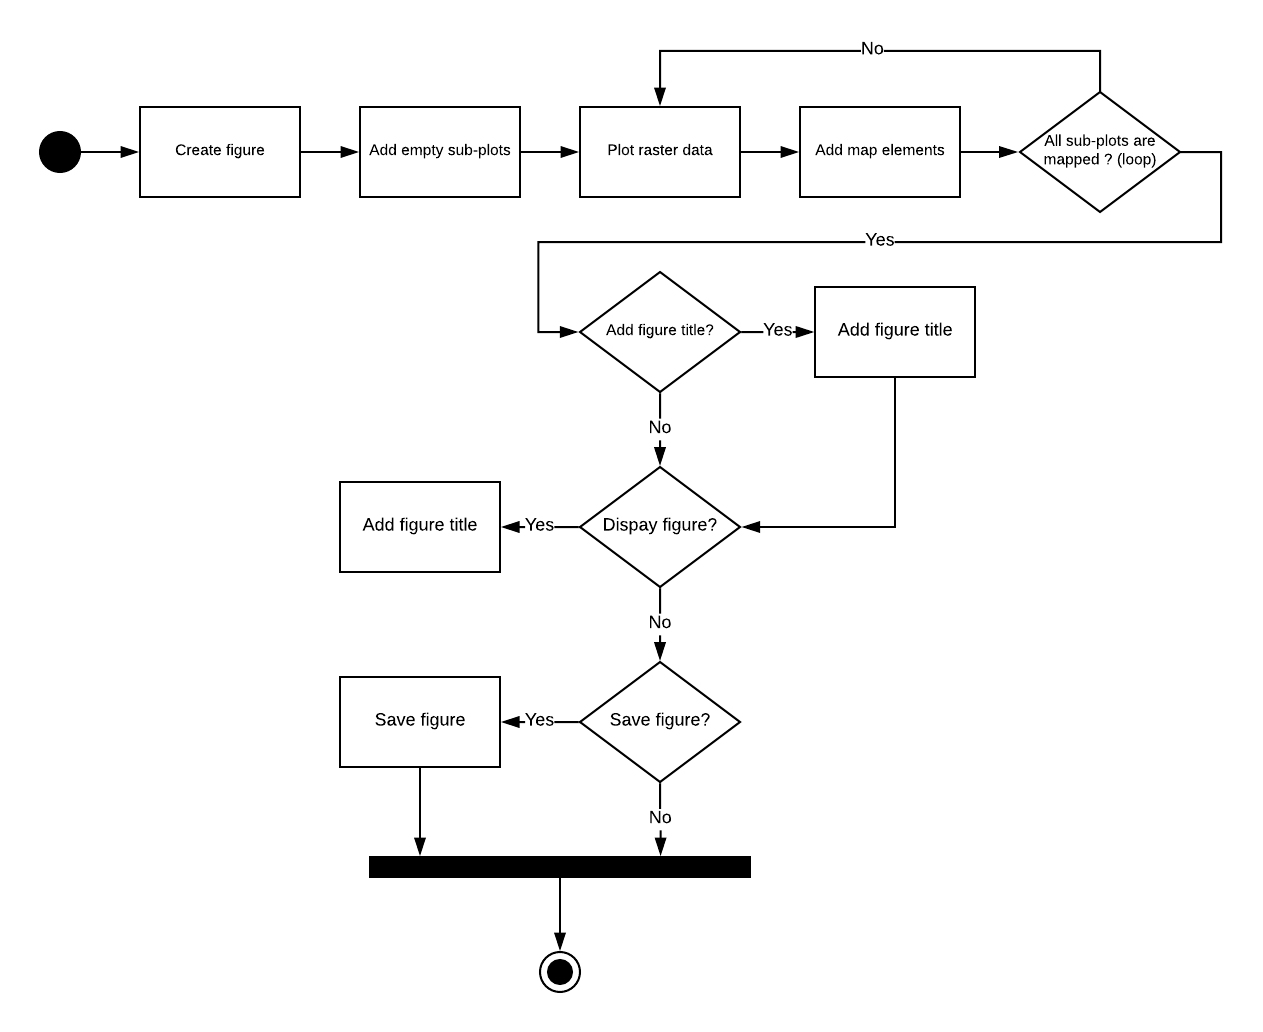
<center>**Fig 3. ULM flowchart - Map Data Class**</center>

In [8]:
class MapData():
    
    def __init__(self,dim,size):
        #Create figure with subplots.
        
        #args:
            #dim (tuple): Contains two integers. Specifies the number of rows and columns of the figure.
            #size (tuple): Contains two integers. Specifies the length and width of the figure.
            
        self.fig, self.axs = plt.subplots(dim[0], dim[1], figsize=(size[0], size[1]))
        #classes: Defines the size of the figure and the number and subplots.        
        self.fig.subplots_adjust(wspace=.5, hspace=.3)
        #Add white space between plots.
        self.dim = 2 if dim[0]>1 else (1 if dim[1]>1 else 0)
        #int: Dummy variable. Stores the dimension of the axes list.
    
    def create_figure(self,data,**arg):
        #Create raster map and, display and save if requested.
        
        #arg:
            #data (list): Set of nested lists. Each list represents the raster values for one plot. 
            #suptlt (str): Figure title. (optional)
            #plt_tlt (str or list): List of plot titles. For single plot figures a string value is accepted.
            #display (boolean): If true, figure will be displayed (optional).
            #save (str): Name of exported png (optional). If not provided figure will not be exported. 
            #msg (boolean): If true, display pop-up window confirming the export of a figure (optional).

        for i, val in enumerate(data):  
            #Loop through each of the raster data sets provided.
            
            #Define axis dimensions. This is as axes values is stored as string, one- or two-
            #dimensional list depending on the number of sub-plots. 
            if self.dim == 0: 
                axis = self.axs #string
            elif self.dim ==1:
                axis = self.axs[i] #one-dimensional list
            else:
                if i>=2:                    
                    axis = self.axs[1][i-2] #two-dimensional list
                else:    
                    axis = self.axs[0][i] #two-dimensional list
          
            tlt = arg['plt_tlt'] if self.dim==0 else arg['plt_tlt'][i]
            #Set plot title. Account for list or string arguments.
            self.create_sub_plots(data[i],axis,tlt)
            #Create sub-plots. 
            
        if 'suptlt' in arg:
            #If figure title submitted, add to figure.
            self.fig.suptitle(arg['suptlt'], fontsize=14,color='#565656')
            
        if 'display' in arg and arg['display']: self.fig.show()
            #If display is true, show figure.
            
        if 'save' in arg: 
            #if a text string was submitted save figure.
            success = self.save_figure(arg['save'])
            if success and arg['msg']:
                #If true, display tkinter pop-up window. 
                t = tk.Tk()
                t.withdraw() 
                msgbox.showinfo('Success','Your map has been sucessfully saved.')
               
    def create_sub_plots(self,val,axis,title):
        #Create sub plots.
        
        #args:
            #val (list): Raster data. Each value represents one pixel.
            #axis (class): matplotlib axes instance. Required to create figure elements.
        
        fs = 10 if self.dim ==0 else (8 if self.dim==1 else 6)
        #Adjust tick font size according to the plot dimension.
        
        #Plot data and add colorbar legend.
        p = axis.imshow(val,cmap=plt.cm.BuPu)
        cax = make_axes_locatable(axis).append_axes("right", size="4%", pad=0.15)
        #Adjust color-bar size to plot height.
        self.cb = self.fig.colorbar(p, cax=cax)
        self.cb.ax.tick_params(labelsize=fs) 

        
        #Add axis labels and convert axis ticks values to km.
        axis.set_xlabel('km',fontsize=fs*1.2)
        axis.set_ylabel('km',fontsize=fs*1.2)
        axis.xaxis.set_major_locator(ticker.FixedLocator((np.arange(0, 400, step=50))))
        axis.xaxis.set_major_formatter(ticker.FixedFormatter((np.arange(0, 40, step=5))))
        axis.yaxis.set_major_locator(ticker.FixedLocator((np.arange(0, 400, step=50))))
        axis.yaxis.set_major_formatter(ticker.FixedFormatter((np.arange(0, 40, step=5))))
        axis.tick_params(axis = 'both', which = 'major', labelsize = fs)
        
        #Add plot title
        axis.set_title(title+'\n',color='#565656',fontsize =fs*1.3)
        
        
    
    def save_figure(self,title):
        #Export plot to png.
        
        #arg:
            #title (str): Plot title.
        
        #return:
            #success (boolean): Turns to true if figure was successfully exported.
        
        success = False
        #boolean: Indicates whether export was successful.
        
        try:         
            self.fig.savefig(os.path.join('OUTPUT',title +'.png')) 
            #Export figure as png.
            success = True
            #Change boolean to true
        except IOError:
            msgbox.showerror("Error","File path is not valid. Please rerun the setWD class.")
            #Alert user of path error.
        except MemoryError:
            msgbox.showerror("Error","There is not enough disk space on this computer to save the map.")
            #Alter user of memory error.
        except:
            msgbox.showerror("Error","Unexpected error occurred:", sys.exc_info()[0])  
            #Alert user of any other error encountered.
        finally:
            return success
            #return boolean. 

### <a id="CalculateDeaths"><font color="#0089fe">II.IV. Calculate the average number of plague deaths per week</font></a>

The expected number of weekly deaths per 100m<sup>2</sup> attributable to the black death is defined as deaths (d) = (r x rat) x (p x pop) where `rat` equals the average number of rats caught per week per 100m<sup>2</sup> and  `pop` denotes the average population density per 100m<sup>2</sup>.<br> The default values for the parameters `r` and `p` were derived from a hypothetical study and are set at 1.3 (p) and 0.8 (r) respectively. (See <a id="section_ID" href="http://www.geog.leeds.ac.uk/courses/computing/study/core-python-odl/assessment2/death.html">Black death project</a> for details.) <br>
Before being able to calculate the number of deaths occurring at each position in the raster, the number of rats caught have to be calculated per  100m<sup>2</sup>. <br>

All function related to the calculation of the number of weekly deaths per 100m<sup>2</sup> attributable to the black death  and the generation of the raster are consolidated in the `CalculateDeaths` class.

In [9]:
class CalculateDeaths():
    #Calculate weekly number of deaths per 100m x 100m.

    def __init__(self,map_data,deaths,tlt_deaths):
        #define default parameters.
        
        #args:
            #map_data (list): Contains two raster arrays (population density and number of rats caught).
            #deaths (lest):  Empty list to store the deaths rasters data for different parameters.
            #tlt_deaths (tuple): Empty tuple to store the total number of deaths for different parameters.
        
        self.r = .8
        #float: Assign default value for parameter r.
        self.p = 1.3
        #float: Assign default value for parameter p.
        self.map_data = map_data
        #list: Assign raster data sets (arrays) from input files ([0] = population density, [1] = number of rats caught).
        self.deaths = deaths
        #array: Assign raster data sets (arrays) containing the average number of deaths per pixel
        #([0] = default parameters, [1] = number of rats caught).
        self.tlt_deaths = tlt_deaths
        #list: Sum of deaths for different parameters used.
        
    
    def calc_rat_density(self):
        #Calculate number of rats caught per 100m x 100m.
        
        ary = []
        #array: Empty array to store the recalculated number of rats caught.
        
        #Get the size of each rat catcher area.
        lgt = [0,len(self.map_data[1])]
        #list: Start position of each new rat catcher's area.
        for i, val in enumerate(self.map_data[1]):
            #loop through each line of the raster to find the first position of a new rat catcher area.
            if i > 1:
                if val[0]!= self.map_data[1][i-1][0]:
                    lgt.insert(len(lgt)-1,i) 
                    #Append value to array.
        
        #Calculate rats caught per 100m x 100m.
        x = 1
        #int: Dummy variable reflecting the rat catcher area. 
        for i, line in enumerate(self.map_data[1]):
            row = []
            #list: Store the list of raster values for one line.
            if lgt[x]==i: x+=1 
            #If line number equals the start position of a new rat catcher domain move to the next domain.
            val = lgt[x] - lgt[x-1]
            #int: size (length) of rat catcher domain.
            for j in line:
                #Loop though each value in the raster line.
                row.append(j/(val*100))
                #Add value to row list.
            ary.append(row)
            #Add row to the raster array.
        return ary
        #return raster array.
  
    def update_rp(self,r,p):
        #Update r and p parameters based on user inputs.
        
        #args:
            #r (float): user input value retrieved from slider.
            #p (float): user input value retrieved from slider.
        self.r = r
        self.p = p
        self.calc_deaths(1)
        #Recalculate deaths.
   
    def calc_deaths(self,i):
        #Calculate the number of deaths per 100m x 100m.
        
        #arg:
            #i (int): Denotes default parameters (0) or user-defined parameters (1)
        self.tlt_deaths[i] = 0
        #Reset the sum of deaths to 0.
        try:
            self.deaths[i]=[]
            #Clear the death raster stored.
        except IndexError:
            self.deaths.append([])
            #Add second list to death raster. 
        for rp, rr in zip(self.map_data[0],self.map_data[2]):
            #Loop through each row of the rasters.
            row = []
            #list: Temporary list. Each value indicates the number of deaths per pixel. 
            for pop,rat in zip(rp,rr):
                #Loop through each value a line.
                deaths = (self.r * float(rat)) * (self.p * float(pop))
                #float: Calculate the number of deaths per pixel.
                row.append(deaths)
                #Append the number of deaths to the list.
                self.tlt_deaths[i] += deaths if deaths <= pop else pop
                #Add the deaths to the  sum of deaths. Make sure the number of deaths does not exceed the total population.
            self.deaths[i].append(row)
            #Append row to raster array.

    def save_death_raster(self,**arg):
        #Export raster data as text file.:
        
        #args:
            #r (float): user-defined model parameter r
            #p (float): user-defined model parameter p
        
        try:
            title =  'deaths_p{0}_r_{1}.txt'.format(arg['p'],arg['r'])   if 'p' in arg else 'deaths.txt'
            #str: output file name. Include parameters if user-defined parameters exist.
            with open(os.path.join('DATA',title), "w") as file:
                #Open file.
                for line in self.deaths[arg['i']]:
                    file.write(','.join(str(val) for val in line)+'\n') 
                    #Convert list to a comma-separated string and write to file.
            file.close()
            #Close file.
            if arg['i'] ==1: msgbox.showinfo('Success','The raster data has been sucessfully exported.')
            #If user requested to save data, display success message.
        except (ValueError, IOError):
            #If error encountered while writing raster data to the file, display error message.
            er_msg = tk.Tk()
            er_msg.withdraw()   
            msgbox.showerror("Error","Could not write data to file")

### <a id="InteractivePlot"><font color="#0089fe">II.IV. Update interatcive plot</font></a>
Updates and exports the interactive plot based on user inputs and commands.

In [10]:
class InteractivePlot():
        
    def __init__(self,fig,ax,cb,map_data,deaths):
        #Import interactive figure, data and map elements.
        
        #args:
            #fig (class): Interactive figure. 
            #ax (class): Interactive plot elements.
            #cb (class): Interactive plot color-bar.
            #deaths (list): Contains two raster arrays with the number of plague deaths (default parameter and user-defined parameters)).
            #map_data(list): Contains two raster arrays (population density and number of rats caught).
        self.fig = fig
        self.ax = ax
        self.cb = cb
        self.deaths = deaths
        self.map_data = map_data
    
    def update(self,val):
        #Update the map based on the user-defined parameters.
        
        #args:
            #val (float): User-defined r or p parameters. 
        self.cb.remove()
        #Remove and color bar.
        
        d.update_rp(par_pop.val,par_rat.val)
        #Update the r and p parameters. 
        
        #Map raster data and recreate the colorbar.
        pos = self.ax.imshow(self.deaths[1], cmap= plt.cm.BuPu)
        cax = make_axes_locatable(self.ax).append_axes("right", size="4%", pad=0.15)
        self.cb = self.fig.colorbar(pos, cax=cax)
        self.cb.set_label('# of deaths')
        
        #Overwrite the default spacing defined in the  
        self.ax.set_title('Cumulative weekly deaths: {0}'.format("{:,}".format(int(round(tlt_deaths[1],0)))),color='#565656')
        #Update the plot title with the new cumulative number of deaths.
        self.fig.canvas.draw_idle()
        #Redraw the figure.
        
    def reset(self,event):
        #Reset the parameters to the default values.
        print('got here')
        par_rat.reset()
        par_pop.reset()
        
        self.update(val)
        #Update the map. 


    def save_map(self,event):
        #Export the map with user-defined parameters.
        
        #To avoid having the sliders and button on the map, create a new map with the 
        #user parameters using the MapData class.
        
        m = MapData([1,1],[8,5])
        data = []
        data.append(self.deaths[1])
        title = 'Plague deaths per 100m x 100m\n(p=p{0} r={1})'.format(round(d.p,2),round(d.r,2))
        print(title)
        if len(map_title)==3:
            map_title.append(title)
        else:
            map_title[3]= title
        m.create_figure(data,plt_tlt=title,display=False,save='Black_death_deaths_p{0}_r{1}'.format(round(d.p,2),round(d.r,2)),msg=True)
        m.close()    
        
    def save_all(self,event):
        #Export the map with user-defined parameters.
        
        #To avoid having the sliders and button on the map, create a new map with the 
        #user parameters using the MapData class.
        
        m = MapData([2,2],[10,10])
        data = self.map_data[:2]
        data.extend(self.deaths)
        title = 'Plague deaths per 100m x 100m\n(p=p{0} r={1})'.format(round(d.p,2),round(d.r,2))
        if len(map_title)==3:
            map_title.append(title)
        else:
            map_title[3]= title
        
        m.create_figure(data,plt_tlt=map_title,display=False,save='Black_death_deaths_p{0}_r{1}'.format(round(d.p,2),round(d.r,2)),msg=True)
        #m.close()    
        
    def export_map_data(self,event):
        #Export raster values as text file.
        d.save_death_raster(i=1,p=d.p,r=d.r)
        #Use the export function form the Deaths class (args:i(integer),r=model parameter (float), p= model parameter (float) )

## <a id="part_III"><font color="#0089fe">Part III. Execute the program</font></a>
The final porgram consits of three parts
1. Import and map the input raster files.
2. Calculate and map the expected number of plague deaths.
3. Dispay and export all three maps.
4. Create an interactive plot allowing users to change the default parameters.

### <font color="#0089fe">III.I Map input rasters</font></a>
Before mapping the input raster files, the working directory has to be defined and the input raster files have to be imported and coverted into an array where each value represents one pixel of the raster map. Finally, the program will display and export the two maps into the `Output` sub-folder.




<br><center>***Note: Executing the scipt will generate at least one pop-up window. It is possible that the window will show in the background. Make sure to either confirm or close the popup window before continuing with the next section of the code.***</center>

<IPython.core.display.Javascript object>


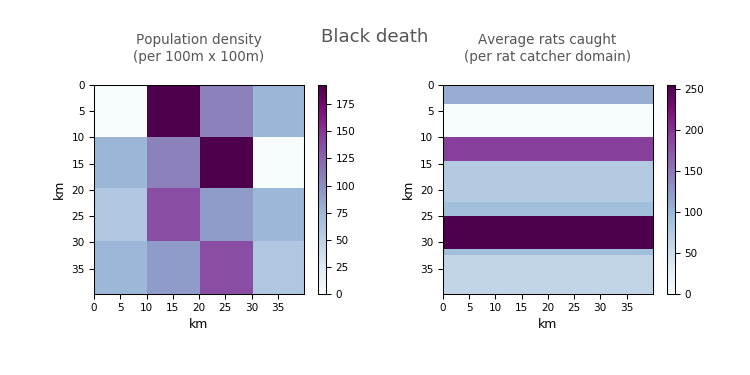

In [11]:
path = SetWD()
#Set working directory.
map_data = []
#list: Create an empty array that stores the raster arrays.

l = LoadData(map_data)
#class: Import list containing raster arrays (args: raster arrays (list))

for i,val in enumerate(['death.parishes','death.rats']):
    #Loop through the list of data sets to be loaded.
    map_data.append(l.read_data(val)) 
    #load the data set.
    l.set_map_area(i)
    #Adjust the raster size to only include the 16 square parishes.
print(path)    
map_title = ['Population density\n(per 100m x 100m)','Average rats caught\n(per rat catcher domain)','Plague deaths\n(per 100m x 100m)']
#list: Each list value represents a sup-plot title.
fig_title = '\nBlack death'
#str: Assign figure title.

f1 = MapData((1,2),(8,4))
#class: Create figure (args: suplot layout (tuple), figure size (tuple))

f1.create_figure(map_data[:2],suptlt=fig_title,plt_tlt=map_title,display=True,save='Black_death_pop_rat',msg=False)
#Create figure (args: raster data (array), figure title (str), plot title (str or tuple of string), 
#Display figure (boolean), save figure (str), display sucess message (boolean)).
 

### <font color="#0089fe">III.II Calculate and map plague deaths</font></a>
The below code calculates the number of deaths per 100m<sup>2</sup>. The resulting raster of plague deaths is exported into the `Data` sub-folder and the cumulative number of weekly palgue deaths is printed out. Finally the program will display the  plague deaths as raster map. A copy of the map is exported into `Output` sub-folder. 

##### <font color="#0089fe">Generate plague deaths raster</font>

In [13]:
deaths = []
#list: Create an empty array to store black death raster values ([0] raster using default paramenter, 
#[1] raster based on user-defined parameters.)

tlt_deaths = [0,0]
#list: Create empty list to save sum of death across the 16 square parishes. ([0] sum of deaths using default parameters,
#[1] sum of deahts using user-defined parameters).

d = CalculateDeaths(map_data,deaths,tlt_deaths)
#class: Assign class (arg: input rasters (array), output raster (array),total deaths (tuple)).
map_data.append(d.calc_rat_density())
#Calculate number of rats caught per 100m x 100m.
d.calc_deaths(0)
#Calculate the number of deaths (arg: Indicates default parameters (int)).
#Save deaths raster data to file
d.save_death_raster(i=0) 
#Export deaths raster as text file (args: defines whether default or user-defined parameters should be exported (int)).

##### <font color="#0089fe">Print cumulative number of weekly plague deaths</font>

In [14]:
print('The plague outbreak is causing an estimataed {0} deahts per week.'.format("{:,}".format(int(round(tlt_deaths[0],0)))))
# Print total deaths

The plague outbreak is causing an estimataed 335,308 deahts per week.


##### <font color="#0089fe">Map plague deahts</font>

<IPython.core.display.Javascript object>


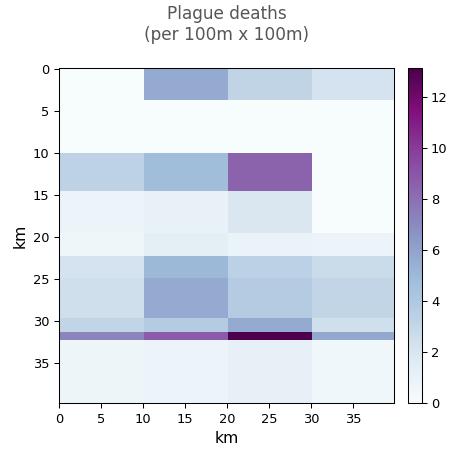

In [15]:
f2 = MapData([1,1],[5,5])
#class: Create figure (args: suplot layout (tuple), figure size (tuple))
f2.create_figure(deaths,plt_tlt=map_title[2],display=True,save='Black_death_deaths',msg=False)
#Create figure (args: raster data (array), figure title (str), plot title (str or list of string), 
#display figure (boolean), save figure (str), display sucess message (boolean)).

##### <font color="#0089fe">Display all three raster maps</font>

<IPython.core.display.Javascript object>


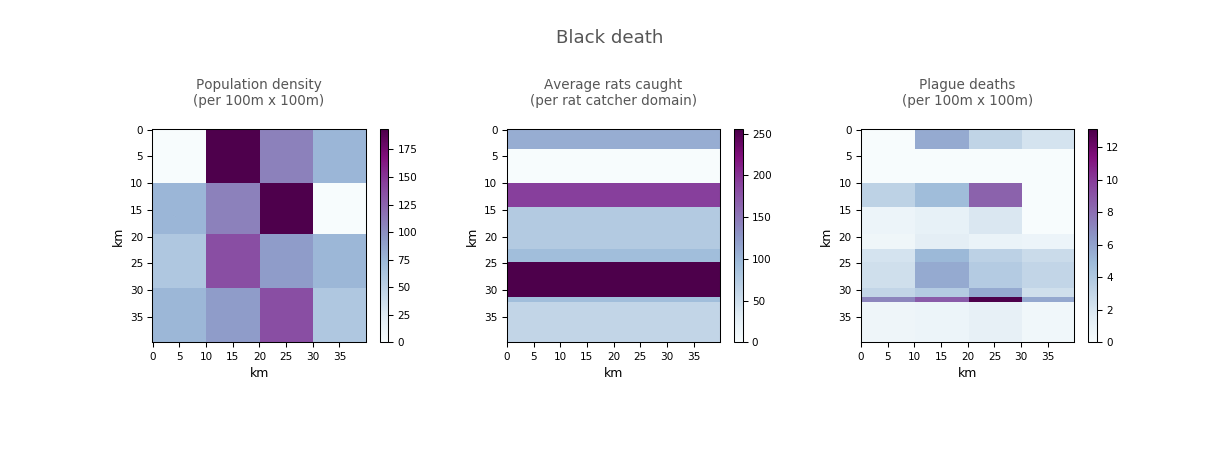

In [16]:
f3 = MapData([1,3],[13,5])
#class: Create empty figure with three plots on one row. 

plot_data = [map_data[0],map_data[1],deaths[0]]
#list: Combine the three raster arrays (population density, number of rats caught and number of deaths) in one list.
f3.create_figure(plot_data,suptlt=fig_title,plt_tlt=map_title,display=True,save='Black_death_pop_rat_deaths',msg=False)
#Create figure (args: plot_data=raster data (array), suptlt=figure title (str), plt_tlt=plot title (str or tuple of string), 
#display=display figure (boolean),save=figure file name (str), display sucess message (boolean)).

### <font color="#0089fe">III.III Create an interactive map of plague deaths</font></a>
Create an interactive figure enabling users to increase/deacrease plague related mortality by change the default parameter of the formula used to calculate the deaths per 100m<sup>2</sup>. The figure further enables user to export the map as well as the raster data as text file based on user-defined parameter.
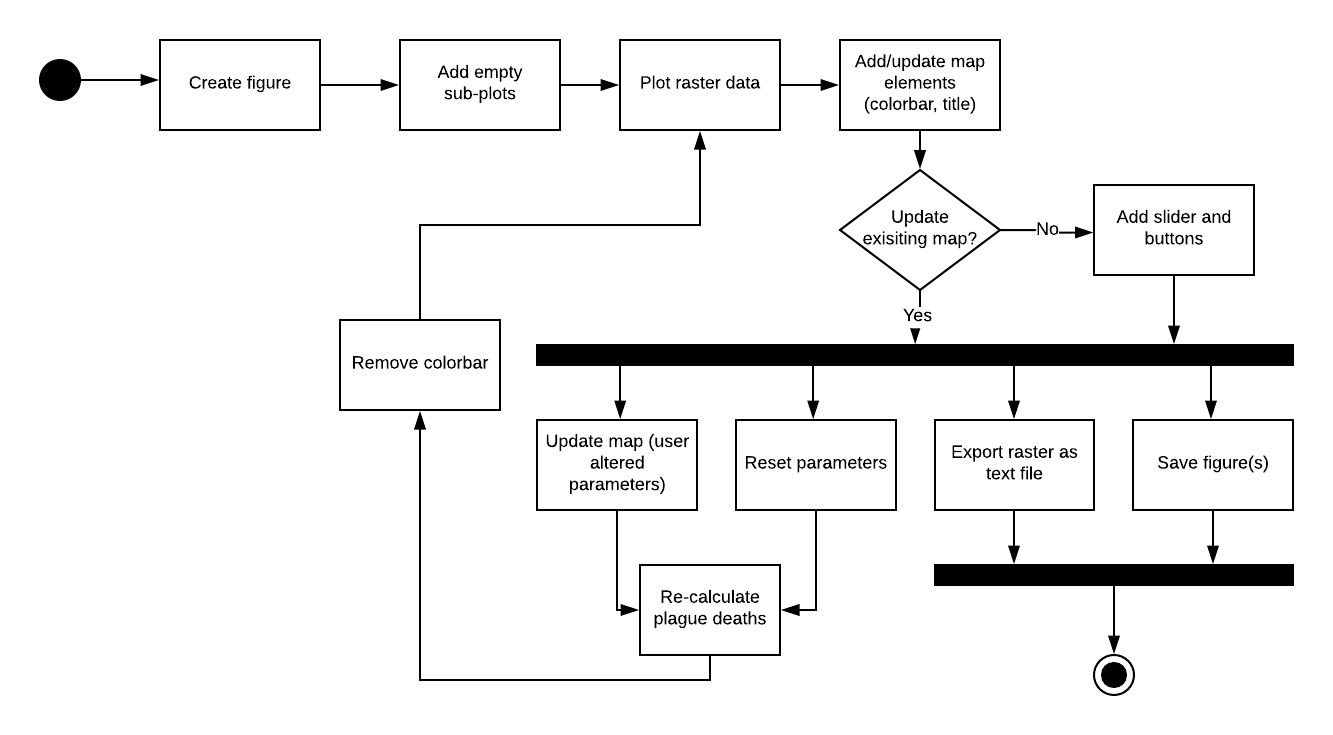

<center>**Fig 4. ULM flowchart - Updating the interactive map**</center>
<br>
<center>*Rerun the code below to enable the interactive plot*</center>

<IPython.core.display.Javascript object>


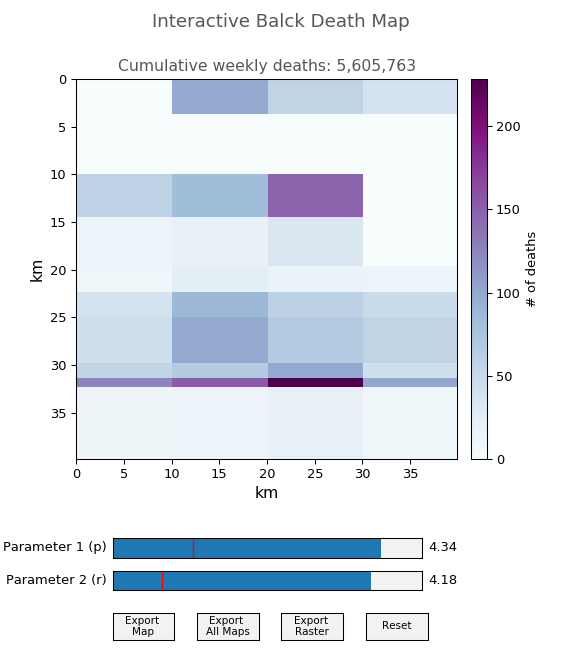

In [17]:
d.calc_deaths(1)
#Duplicate the deaths raster and append it to the deahts list.
#A second raster array is required that will be updated if the user change the model parameers.

f4 = MapData([1,1],[6,7])
#class: Create a new figure with a single plot.
f4.create_figure([deaths[1]],suptlt='Interactive Balck Death Map\n',
                 plt_tlt='Cumulative weekly deaths: {0}'.format("{:,}".format(int(round(tlt_deaths[1],0)))),display=False,label='')
#Plot the weekly number of deaths per 100m x 100m. 
f4.fig.subplots_adjust(left=.1, bottom=0.3,right=.9)
#Overwrite default spacing to account for sliders.

#Add sliders
par_rat = Slider(plt.axes([0.2, 0.1, 0.55, 0.03], facecolor='#F1F2F2'), 'Parameter 2 (r)', 0, 5, valinit=0.8)
#Add slider for the r parameter and set the default value to 0.8.
par_pop = Slider(plt.axes([0.2, 0.15, 0.55, 0.03], facecolor='#F1F2F2'), 'Parameter 1 (p)', 0.0, 5, valinit=1.3)
#Add slider for the p parameter and set the default value to 1.3.

#Add buttons
btnRest = Button(plt.axes([0.65, 0.025, 0.11, 0.04]), 'Reset', color='#F1F2F2', hovercolor='0.975')
#Add rest button.
btnExportMap = Button(plt.axes([0.2, 0.025, 0.11, 0.04]), 'Export \nMap', color='#F1F2F2', hovercolor='0.975')
#Add button  allowing user to export the map.
btnSaveAll = Button(plt.axes([0.35, 0.025, 0.11, 0.04]), 'Export \nAll Maps', color='#F1F2F2', hovercolor='0.975')
#Add button allowing user to export the data.
btnExportData = Button(plt.axes([0.5, 0.025, 0.11, 0.04]), 'Export \nRaster', color='#F1F2F2', hovercolor='0.975')
#Add button allowing user to export all four maps (population density, number of rats caught, deaths (default paramets),
#deahts (user-defined parameters).

for i in (btnRest,btnExportMap,btnExportData,btnSaveAll):
    i.label.set_fontsize(8)

#Assign functions to buttons
int_plot = InteractivePlot(f4.fig,f4.axs,f4.cb,map_data,deaths)
btnExportMap.on_clicked(int_plot.save_map)
btnExportData.on_clicked(int_plot.export_map_data)
btnSaveAll.on_clicked(int_plot.save_all)
btnRest.on_clicked(int_plot.reset)
par_rat.on_changed(int_plot.update)
par_pop.on_changed(int_plot.update)

f4.fig.show()
#display figure

    